#  MULTIPLE LINEAR REGRESSION

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\DELL\Desktop\Data Science\Assignment Questions\MLR\ToyotaCorolla - MLR.csv')
print(df.head())

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  


In [3]:
# Check for missing values
print(df.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [4]:
# Summary statistics of the dataset
print(df.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

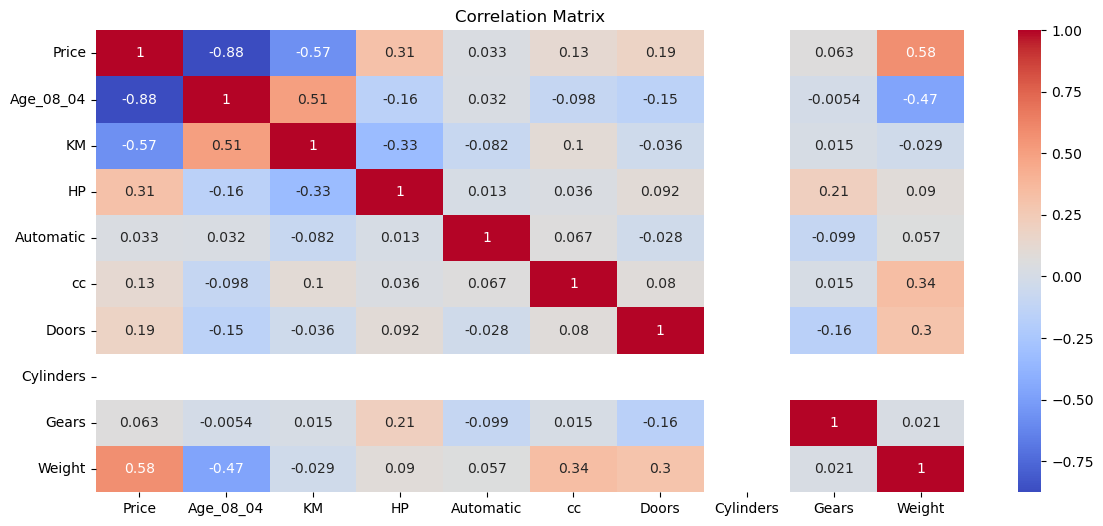

In [5]:
# Visualizations
# Assuming df is your DataFrame
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize = (14, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

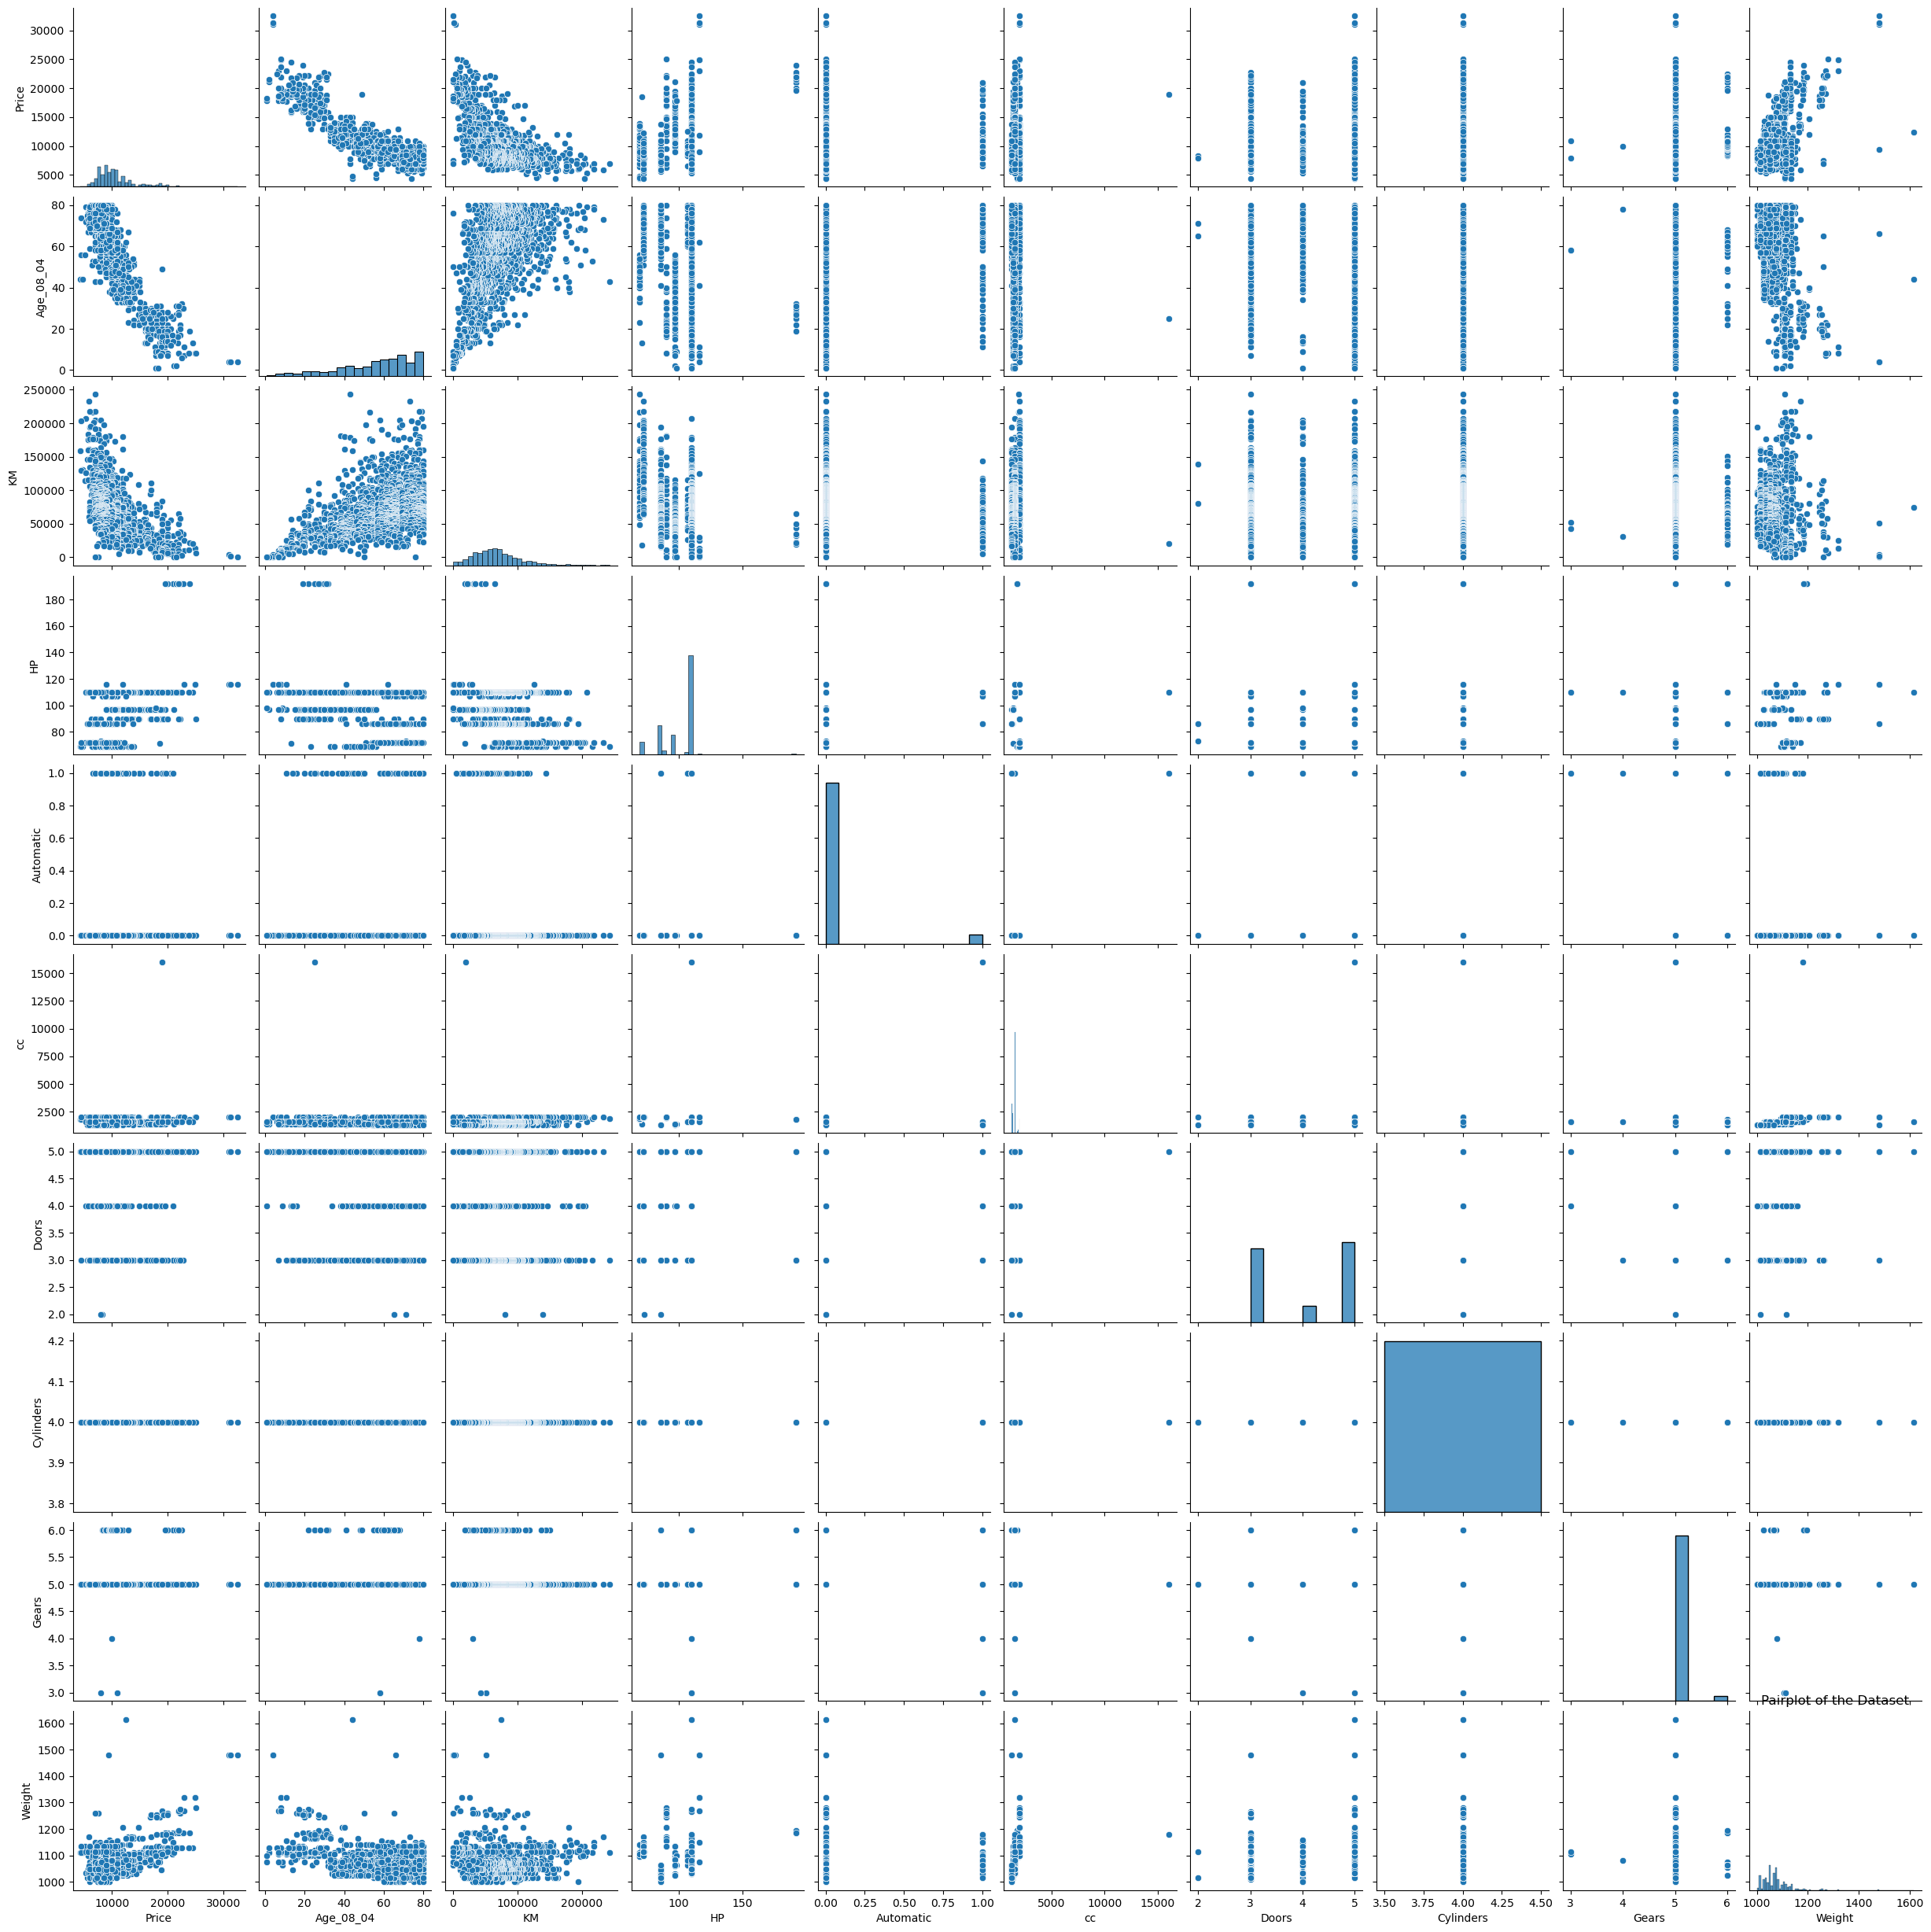

In [6]:
plt.figure(figsize=(10, 6))
sns.pairplot(df)
plt.title('Pairplot of the Dataset')
plt.show()

In [7]:
print(df.columns)

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [8]:
# One-hot encode 'Fuel_Type' column, dropping the first category
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)
print(df)

      Price  Age_08_04     KM   HP  Automatic    cc  Doors  Cylinders  Gears  \
0     13500         23  46986   90          0  2000      3          4      5   
1     13750         23  72937   90          0  2000      3          4      5   
2     13950         24  41711   90          0  2000      3          4      5   
3     14950         26  48000   90          0  2000      3          4      5   
4     13750         30  38500   90          0  2000      3          4      5   
...     ...        ...    ...  ...        ...   ...    ...        ...    ...   
1431   7500         69  20544   86          0  1300      3          4      5   
1432  10845         72  19000   86          0  1300      3          4      5   
1433   8500         71  17016   86          0  1300      3          4      5   
1434   7250         70  16916   86          0  1300      3          4      5   
1435   6950         76      1  110          0  1600      5          4      5   

      Weight  Fuel_Type_Diesel  Fuel_Ty

In [9]:
# Define feature variables and target variable
X = df.drop(['Price'], axis=1)
y = df['Price']

In [10]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-1.77196633 -0.57469494 -0.76804185 ...  1.75856113  2.87480715
  -2.71087388]
 [-1.77196633  0.11745379 -0.76804185 ...  1.75856113  2.87480715
  -2.71087388]
 [-1.71818412 -0.71538641 -0.76804185 ...  1.75856113  2.87480715
  -2.71087388]
 ...
 [ 0.80957948 -1.37403589 -1.03513832 ... -1.09191497 -0.34784942
   0.36888474]
 [ 0.75579727 -1.37670303 -1.03513832 ... -1.09191497 -0.34784942
   0.36888474]
 [ 1.0784905  -1.82784925  0.5674405  ...  0.78939926 -0.34784942
   0.36888474]]


In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=42)

In [12]:
# Build and train multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Get the model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                  Coefficient
Age_08_04        -2246.662441
KM                -608.570564
HP                 210.253304
Automatic           34.136075
cc                 -12.885069
Doors              -57.436845
Cylinders            0.000000
Gears              103.946283
Weight            1362.138679
Fuel_Type_Diesel   -21.270885
Fuel_Type_Petrol   445.102711


In [14]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred

array([11137.15453645,  8974.9731327 ,  9283.27025955,  8951.97440751,
       10082.31592852,  7959.3269862 ,  8656.43768303,  8254.87283979,
       14063.40319186, 13099.95735642,  9551.42647033,  9325.01973397,
       12919.13152502, 12925.08574757,  9793.37148737,  8305.77313577,
       12190.02678644, 17535.47631867,  7469.10553333,  9146.75133486,
       12638.29998775, 17804.25328461,  7903.43441681, 10386.01442865,
        7580.43295913, 16058.83988677, 10034.10324597,  7412.37291567,
       15766.17628452, 14440.45886039,  8163.90729602,  9609.36755541,
        8509.88035778, 10098.71270421, 10245.63943307,  8073.58357557,
        8759.24335824,  9965.93592783, 16471.77872927,  9624.35819079,
        9829.937657  ,  9503.46762021,  7888.13705539,  5698.36965348,
        6870.22880548, 17266.12085347,  9441.28892372, 10702.0580487 ,
        8748.50876678, 13429.13420122, 12940.89346452,  6393.20092254,
       15071.98364029, 16374.4739198 ,  6194.47032501,  7783.01004642,
      

In [15]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}\n')
print(f'R-squared: {r2}')

Mean Squared Error: 2203043.823143704

R-squared: 0.8348888040611081


In [16]:
# Build and evaluate Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Mean Squared Error: {mse_lasso}\n')
print(f'Lasso R-squared: {r2_lasso}')


Lasso Mean Squared Error: 2202734.651960389

Lasso R-squared: 0.8349119754675463


In [17]:
# Build and evaluate Ridge model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Mean Squared Error: {mse_ridge}\n')
print(f'Ridge R-squared: {r2_ridge}')

Ridge Mean Squared Error: 2202805.7720785015

Ridge R-squared: 0.8349066452386903


In [21]:
#  Questions & Answers::
normalization_standardization = """
Normalization is the process of scaling individual samples to have unit norm, while standardization scales features to have mean zero and unit variance. Both techniques help in improving the convergence of gradient-based algorithms.
"""
print(normalization_standardization)
multicollinearity_techniques = """
Techniques to address multicollinearity include removing highly correlated predictors, using principal component analysis (PCA), and applying regularization methods like Lasso and Ridge regression.
"""
print(multicollinearity_techniques)
 


Normalization is the process of scaling individual samples to have unit norm, while standardization scales features to have mean zero and unit variance. Both techniques help in improving the convergence of gradient-based algorithms.


Techniques to address multicollinearity include removing highly correlated predictors, using principal component analysis (PCA), and applying regularization methods like Lasso and Ridge regression.

